# Task 1

Your first task is to perform a basic clean up and summary analysis of the data. 

Your objective is to summarise the data in a way that simplifies the subsequent tasks. A region by region estimate of the annual millage of different classes of vehicles is a good starting point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pylab
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR

# Raw data

In [2]:
raw_counts = pd.read_csv('dft_traffic_counts_raw_counts.csv', sep=',', skipinitialspace=True)
raw_counts

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,501,E,2000,2000-06-09,7,4,Wales,W92000004,6,Newport,...,33,539,164,25,22,25,91,59,391,3460
1,501,E,2000,2000-06-09,8,4,Wales,W92000004,6,Newport,...,46,467,171,29,19,29,136,52,450,4168
2,501,E,2000,2000-06-09,9,4,Wales,W92000004,6,Newport,...,30,388,210,12,11,12,186,66,519,3167
3,501,E,2000,2000-06-09,10,4,Wales,W92000004,6,Newport,...,28,353,221,30,17,30,148,82,541,3090
4,501,E,2000,2000-06-09,11,4,Wales,W92000004,6,Newport,...,31,385,204,27,20,27,166,87,555,3337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919783,990281,E,2006,2006-04-27,9,9,South East,E12000008,82,Portsmouth,...,0,22,5,3,4,3,1,0,13,0
3919784,990281,E,2006,2006-04-27,10,9,South East,E12000008,82,Portsmouth,...,0,35,9,1,3,1,0,0,13,0
3919785,990281,E,2006,2006-04-27,11,9,South East,E12000008,82,Portsmouth,...,0,30,7,6,5,6,0,0,19,0
3919786,990281,E,2006,2006-04-27,13,9,South East,E12000008,82,Portsmouth,...,0,38,5,2,8,2,1,2,18,0


In [3]:
raw_df = raw_counts[['year','count_date', 'region_name','link_length_miles', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles']]
raw_df['count_date'] = pd.to_datetime(raw_df['count_date'])
raw_miles = raw_df.copy()
raw_df

,year,count_date,region_name,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,2000,2000-06-09,Wales,1.37,0,6,2491,33,539,164,25,22,25,91,59,391,3460
1,2000,2000-06-09,Wales,1.37,0,12,3193,46,467,171,29,19,29,136,52,450,4168
2,2000,2000-06-09,Wales,1.37,0,9,2221,30,388,210,12,11,12,186,66,519,3167
3,2000,2000-06-09,Wales,1.37,0,7,2161,28,353,221,30,17,30,148,82,541,3090
4,2000,2000-06-09,Wales,1.37,0,7,2359,31,385,204,27,20,27,166,87,555,3337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919783,2006,2006-04-27,South East,NaN,19,2,190,0,22,5,3,4,3,1,0,13,0
3919784,2006,2006-04-27,South East,NaN,21,3,176,0,35,9,1,3,1,0,0,13,0
3919785,2006,2006-04-27,South East,NaN,16,2,170,0,30,7,6,5,6,0,0,19,0
3919786,2006,2006-04-27,South East,NaN,19,3,180,0,38,5,2,8,2,1,2,18,0


# Calculate total number of Vehicles/ Year

In [4]:
vehicle_count = raw_df.pivot_table(index = ['count_date'], values=['two_wheeled_motor_vehicles',
 'cars_and_taxis',
 'buses_and_coaches',
 'lgvs',
 'all_hgvs',
 'all_motor_vehicles'], aggfunc='sum')
vehicle_count = vehicle_count.reset_index()
vehicle_count['count_date'] = pd.to_datetime(vehicle_count['count_date'])
all_veh = vehicle_count.copy()

vehicle_count.head()

,count_date,all_hgvs,all_motor_vehicles,buses_and_coaches,cars_and_taxis,lgvs,two_wheeled_motor_vehicles
0,2000-03-17,94756,1395788,17741,1103397,166883,13011
1,2000-03-20,92410,1163281,12893,911093,139103,7782
2,2000-03-21,119158,1498590,14780,1159121,189536,15995
3,2000-03-22,113441,1375484,18516,1067828,162160,13539
4,2000-03-23,100263,1247304,12814,965287,157505,11435


In [5]:
vehicle_count['count_date'] = vehicle_count['count_date'].apply(lambda x: x.year)

In [8]:
sep_vehicle_count = vehicle_count.groupby(['count_date']).agg(
    all_hgvs = ('all_hgvs', lambda x: x.mean().round(2)),
    buses_and_coaches = ('buses_and_coaches', lambda x: x.mean().round(2)),
    cars_and_taxis = ('cars_and_taxis', lambda x: x.mean().round(2)),
    lgvs = ('lgvs', lambda x: x.mean().round(2)),
    two_wheeled_motor_vehicles = ('two_wheeled_motor_vehicles', lambda x: x.mean().round(2)),)

sep_vehicle_count.head()

,all_hgvs,buses_and_coaches,cars_and_taxis,lgvs,two_wheeled_motor_vehicles
count_date,,,,,
2000,104273.64,13867.96,977454.84,154121.93,11250.70
2001,98463.07,14403.81,981689.73,155654.32,12525.41
2002,91651.98,13573.33,930172.72,144648.03,11727.22
2003,87147.76,14231.97,938980.79,146329.42,12998.55
2004,74004.04,12166.73,790939.81,126606.54,10027.49


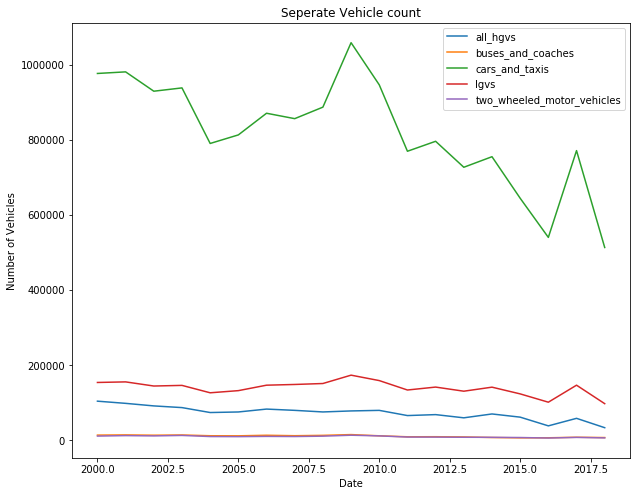

In [7]:
vehicles = ['all_hgvs', 'buses_and_coaches', 'cars_and_taxis', 'lgvs', 'two_wheeled_motor_vehicles']
plt.figure(figsize = (10,8))

for i in vehicles:
    plt.plot(sep_vehicle_count[i], label= i)
    plt.title('Seperate Vehicle count')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    
    plt.legend()
plt.show()

In [11]:
# vehicle_count['count_date'] = vehicle_count['count_date'].apply(lambda x: x.year)
all_vehicle_count = all_veh[['count_date', 'all_motor_vehicles']]
test = all_vehicle_count.set_index('count_date')

No handles with labels found to put in legend.


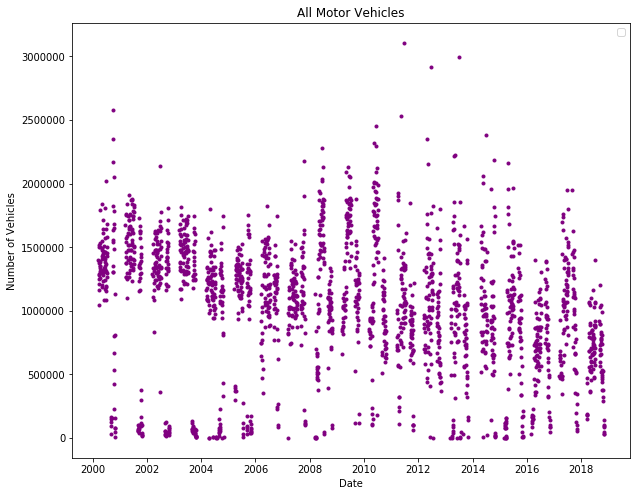

In [12]:
plt.figure(figsize = (10,8))
plt.scatter(all_vehicle_count['count_date'], all_vehicle_count['all_motor_vehicles'],s=9, c = 'purple' )
plt.title('All Motor Vehicles')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Calculate Region/ Region Estimate

In [13]:
df_year = raw_df.groupby(["year"]).link_length_miles.sum().reset_index()
year = df_year.set_index('year')
year.head()

,link_length_miles
year,
2000,337336.800000
2001,334620.720000
2002,422490.119999
2003,337519.680000
2004,351480.240000


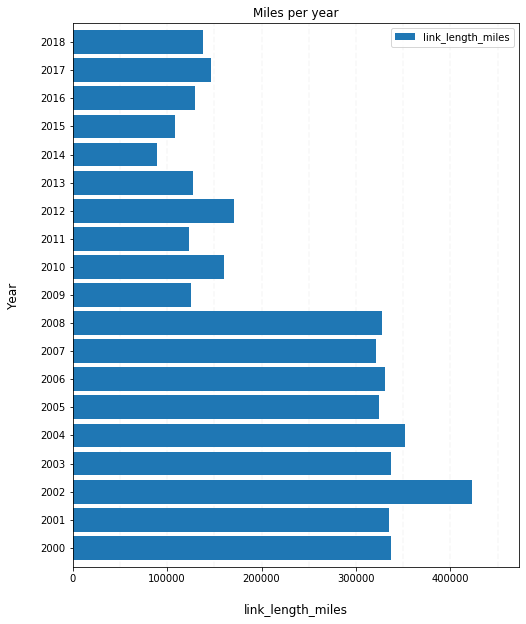

In [14]:
ax = year.plot(kind = 'barh', figsize=(8, 10),  zorder=2, width=0.85)

vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("link_length_miles", labelpad=20, size=12)
ax.set_ylabel("Year", labelpad=20, size=12)
ax.set_title("Miles per year")
ax.legend()

plt.show()

In [15]:
df_region = raw_df.groupby(["region_name"]).link_length_miles.sum().reset_index()
regions = df_region.set_index('region_name')
regions

,link_length_miles
region_name,
East Midlands,422697.599999
East of England,486183.479999
London,164351.160000
North East,176542.680000
North West,435798.839999
Scotland,400883.280000
South East,688567.200000
South West,529383.239999
Wales,347544.480000


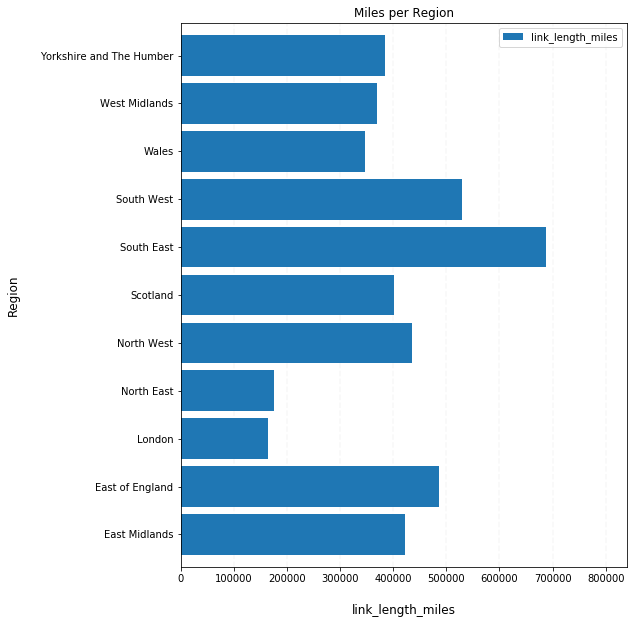

In [16]:
ax = regions.plot(kind = 'barh', figsize=(8, 10),  zorder=2, width=0.85)

vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("link_length_miles", labelpad=20, size=12)
ax.set_ylabel("Region", labelpad=20, size=12)
ax.set_title("Miles per Region")

plt.show()

In [17]:
"""summation of link_length_miles of each reagion, by each year (2000 - 2018)"""

df_sum = raw_df.groupby(["year","region_name"]).link_length_miles.sum().reset_index()
df_sum

,year,region_name,link_length_miles
0,2000,East Midlands,34425.00
1,2000,East of England,38367.12
2,2000,London,11816.64
3,2000,North East,14063.16
4,2000,North West,34170.84
...,...,...,...
204,2018,South East,22175.76
205,2018,South West,19561.68
206,2018,Wales,4968.12
207,2018,West Midlands,13405.80


In [18]:
region_miles  = raw_df[['two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']]\
.multiply(raw_df['link_length_miles'], axis='index').round(2)

region_miles  = region_miles.rename(columns = {'two_wheeled_motor_vehicles': 'two_wheeled_motor_vehicles_mil', \
                          'cars_and_taxis': 'cars_and_taxis_mil', 'buses_and_coaches': 'buses_and_coaches_mil', 'lgvs': 'lgvs_mil', 'all_hgvs': 'all_hgvs_mil'})

raw_df = raw_df.join(region_miles)

raw_df = raw_df.drop(columns = ['two_wheeled_motor_vehicles',
                                 'cars_and_taxis',
                                 'buses_and_coaches',
                                 'all_hgvs',
                                 'lgvs',
                                 'link_length_miles'])

raw_miles_df  = raw_df.groupby(['region_name','count_date']).agg(annual_two_wheeled_motor_vehicles_mil = ('two_wheeled_motor_vehicles_mil', lambda x: x.sum().round(2)),
             annual_cars_and_taxis_mil             = ('cars_and_taxis_mil', lambda x: x.sum().round(2)),
             annual_buses_and_coaches_mil          = ('buses_and_coaches_mil', lambda x: x.sum().round(2)),
             annual_lgvs_mil                       = ('lgvs_mil', lambda x: x.sum().round(2)),
             annual_all_hgvs_mil                   = ('all_hgvs_mil', lambda x: x.sum().round(2)))

In [19]:
raw_miles_df.head()

annual_two_wheeled_motor_vehicles_mil  \
region_name   count_date                                          
East Midlands 2000-03-17                                1080.83   
              2000-03-20                                1241.54   
              2000-03-21                                1231.12   
              2000-03-22                                1035.49   
              2000-03-23                                 885.75   

                          annual_cars_and_taxis_mil  \
region_name   count_date                              
East Midlands 2000-03-17                  104476.45   
              2000-03-20                  152410.95   
              2000-03-21                  113618.77   
              2000-03-22                  151833.11   
              2000-03-23                  116058.31   

                          annual_buses_and_coaches_mil  annual_lgvs_mil  \
region_name   count_date                                                  
East Midlands 2000-03-17                        872.21         17882.88   
              2000-03-20                        719.18         29494.03   
              2000-03-21                       1014.88         20134.38   
              2000-03-22                       1442.97         25932.61   
              2000-03-23                        788.27         21378.31   

                          annual_all_hgvs_mil  
region_name   count_date                       
East Midlands 2000-03-17             10388.21  
              2000-03-20             34581.91  
              2000-03-21             22426.08  
              2000-03-22             24065.03  
              2000-03-23             15336.91

No handles with labels found to put in legend.


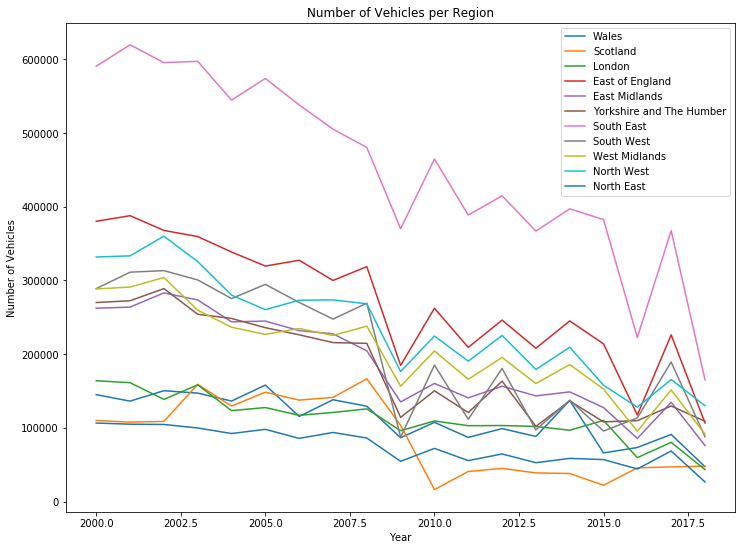

In [20]:
regions = ['Wales', 'Scotland', 'London', 'East of England', 'East Midlands',
       'Yorkshire and The Humber', 'South East', 'South West',
       'West Midlands', 'North West', 'North East']

plt.figure(figsize = (12,9))
plt.title('Number of Vehicles per Region')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()

for i in regions:
    region = raw_miles_df.loc[i].sum(axis = 1).reset_index()

    region = region.rename(columns = {'count_date':'Year', 0: 'vehicles'})

    region['Year'] = region['Year'].apply(lambda x: x.year)
    region = region.groupby(['Year']).agg(vehicles = ('vehicles', lambda x: x.mean().round(2)))
    
    plt.plot(region, label = i)
    plt.legend()


# Task 2

In this task you should use the summary data to perform a regression analysis to estimate likely changes in traffic over the next 10-20 years. You should identify any potential risks associated with this analysis that may place limits on how it can be used.

In [21]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# vehicle forecast 

In [22]:
raw_df.head()

,year,count_date,region_name,pedal_cycles,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_motor_vehicles,two_wheeled_motor_vehicles_mil,cars_and_taxis_mil,buses_and_coaches_mil,lgvs_mil,all_hgvs_mil
0,2000,2000-06-09,Wales,0,164,25,22,25,91,59,3460,8.22,3412.67,45.21,738.43,535.67
1,2000,2000-06-09,Wales,0,171,29,19,29,136,52,4168,16.44,4374.41,63.02,639.79,616.50
2,2000,2000-06-09,Wales,0,210,12,11,12,186,66,3167,12.33,3042.77,41.10,531.56,711.03
3,2000,2000-06-09,Wales,0,221,30,17,30,148,82,3090,9.59,2960.57,38.36,483.61,741.17
4,2000,2000-06-09,Wales,0,204,27,20,27,166,87,3337,9.59,3231.83,42.47,527.45,760.35


In [23]:
all_uk_raw = raw_counts.groupby(['count_date']).agg(all_motor_vehicles = ('all_motor_vehicles', lambda x: x.sum().round(2)))
all_uk_raw = all_uk_raw.reset_index()
all_uk_raw.head()

,count_date,all_motor_vehicles
0,2000-03-17,1395788
1,2000-03-20,1163281
2,2000-03-21,1498590
3,2000-03-22,1375484
4,2000-03-23,1247304


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


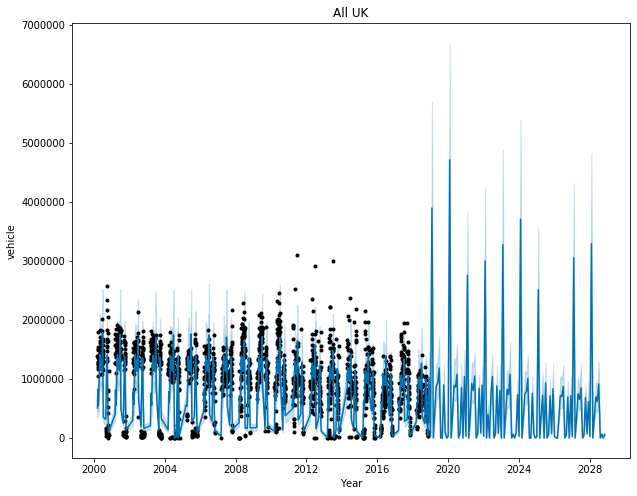

In [24]:
all_uk_raw['count_date'] = pd.to_datetime(all_uk_raw['count_date'])
all_uk_raw = all_uk_raw.rename(columns = {'count_date':'ds','all_motor_vehicles':'y'})
all_uk_raw['y'] = all_uk_raw['y'] + 1e-8

all_uk_raw['y'] = np.log(all_uk_raw['y'])

uk_m = Prophet(growth = 'linear',interval_width = 0.3, changepoint_prior_scale=0.01)
uk_m.fit(all_uk_raw)

uk_future = uk_m.make_future_dataframe(periods=120, freq ='M')

uk_forecast = uk_m.predict(uk_future)
plt.figure(figsize = (10,8))
plt.title('All UK')
plt.ylabel('vehicle')
plt.xlabel('Year')

plt.plot(uk_m.history['ds'].dt.to_pydatetime(), np.exp(uk_m.history['y']), 'k.',markersize = 3.5)

y = np.exp(uk_m.history['y'])
plt.plot(uk_m.history['ds'].dt.to_pydatetime(), y, 'k.')
plt.plot(uk_forecast['ds'], np.exp(uk_forecast['yhat']), ls='-', c='#0072B2')
plt.fill_between(uk_forecast['ds'], np.exp(uk_forecast['yhat_lower']), np.exp(uk_forecast['yhat_upper']), color='#0072B2', alpha=0.2)

In [25]:
raw = raw_counts.groupby(['region_name', 'count_date']).agg(
    annual_two_wheeled_motor_vehicles = ('two_wheeled_motor_vehicles', lambda x: x.sum().round(2)),\
    annual_cars_and_taxis             = ('cars_and_taxis', lambda x: x.sum().round(2)),\
    annual_buses_and_coaches          = ('buses_and_coaches', lambda x: x.sum().round(2)),\
    annual_lgvs                       = ('lgvs',lambda x: x.sum().round(2)),\
    annual_all_hgvs                   = ('all_hgvs',lambda x: x.sum().round(2)))
raw.head()

annual_two_wheeled_motor_vehicles  \
region_name   count_date                                      
East Midlands 2000-03-17                                582   
              2000-03-20                                419   
              2000-03-21                                603   
              2000-03-22                                954   
              2000-03-23                                434   

                          annual_cars_and_taxis  annual_buses_and_coaches  \
region_name   count_date                                                    
East Midlands 2000-03-17                  53003                       768   
              2000-03-20                  58670                       600   
              2000-03-21                  59493                       494   
              2000-03-22                 106820                      2116   
              2000-03-23                  56198                       343   

                          annual_lgvs  annual_all_hgvs  
region_name   count_date                                
East Midlands 2000-03-17         8152             4440  
              2000-03-20        10190            12132  
              2000-03-21         9676            10412  
              2000-03-22        17640            12767  
              2000-03-23         9811             5045

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


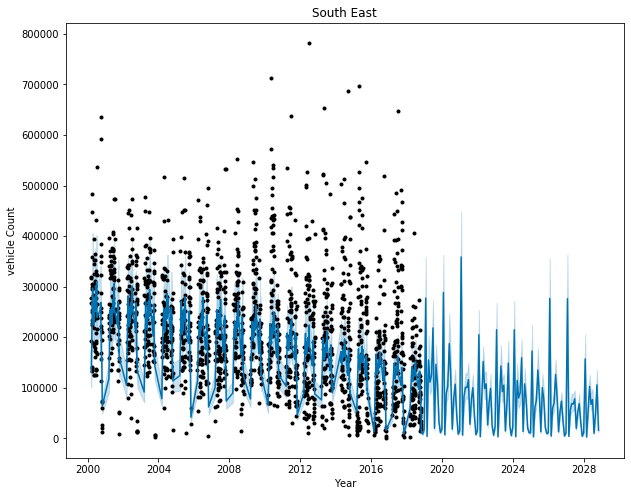

In [26]:
se = raw.loc['South East'].sum(axis = 1).reset_index()

se['count_date'] = pd.to_datetime(se['count_date'])
se = se.rename(columns = {'count_date':'ds',0:'y'})
se['y'] = se['y'] + 1e-8
se
se['y'] = np.log(se['y'])

se_m = Prophet(growth = 'linear',interval_width = 0.3, changepoint_prior_scale=0.01).fit(se)
# se_m.fit(London_total)

se_future = se_m.make_future_dataframe(periods=120, freq ='M')

se_forecast = se_m.predict(se_future)
plt.figure(figsize = (10,8))
plt.title('South East')
plt.ylabel('vehicle Count')
plt.xlabel('Year')

plt.plot(se_m.history['ds'].dt.to_pydatetime(), np.exp(se_m.history['y']), 'k.',markersize = 3.5)

y = np.exp(se_m.history['y'])
plt.plot(se_m.history['ds'].dt.to_pydatetime(), y, 'k.')
plt.plot(se_forecast['ds'], np.exp(se_forecast['yhat']), ls='-', c='#0072B2')
plt.fill_between(se_forecast['ds'], np.exp(se_forecast['yhat_lower']), np.exp(se_forecast['yhat_upper']), color='#0072B2', alpha=0.2)
# add_changepoints_to_plot(fig.gca(), se_m, se_forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


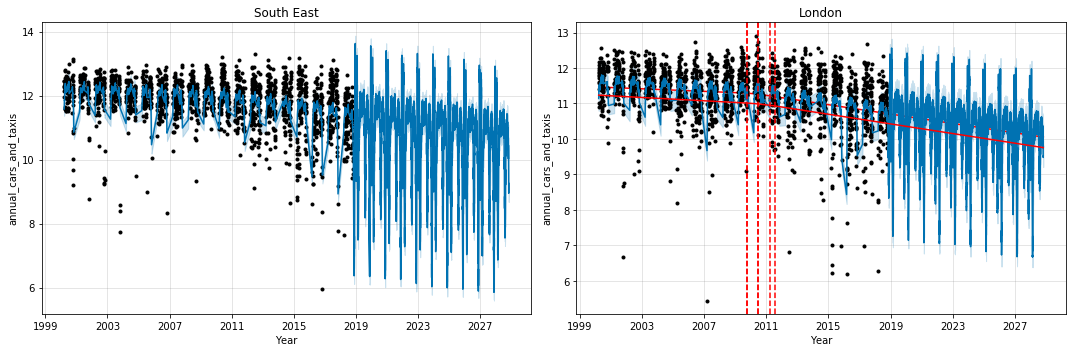

In [27]:
from fbprophet.plot import add_changepoints_to_plot
regions = ['South East', 'London']

f,ax = plt.subplots(1,2, figsize=(15,5))
vehicle = 'annual_cars_and_taxis'

for i, r in enumerate(regions):
    region_total               = raw.loc[r, vehicle].reset_index()
    region_total['count_date'] = pd.to_datetime(region_total['count_date'])
    region_total               = region_total.rename(columns = {'count_date': 'ds', 'annual_cars_and_taxis': 'y'})
    region_total['y']          = region_total['y'] + 1e-8
    region_total['y']          = np.log(region_total['y'])
    
    m  = Prophet(growth = 'linear',interval_width = 0.3, changepoint_prior_scale=0.01)
    m.fit(region_total)
    future   = m.make_future_dataframe(periods = 3652)
    forecast = m.predict(future)
    np.exp(forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']])
    
    ax[i].title.set_text(r)
    fig = m.plot(forecast, ax = ax[i], xlabel = 'Year', ylabel='annual_cars_and_taxis')
    a   = add_changepoints_to_plot(fig.gca(), m, forecast)
    


In [28]:
uk_forecast['yhat'] = np.exp(uk_forecast[['yhat']])

final = uk_forecast[['ds', 'yhat']]
final['ds'] = final['ds'].apply(lambda x: x.year)

test = final.groupby(['ds']).agg(yhat = ('yhat', lambda x: x.mean().round(2)))
test = test.reset_index()

test = test.rename(columns = {'ds':'Year','yhat':'Number of Vehicles'})

test

,Year,Number of Vehicles
0,2000,961162.77
1,2001,1000114.60
2,2002,993645.40
3,2003,974279.79
4,2004,929157.14
5,2005,962242.76
6,2006,971413.33
7,2007,980437.41
8,2008,951771.71
9,2009,982301.97


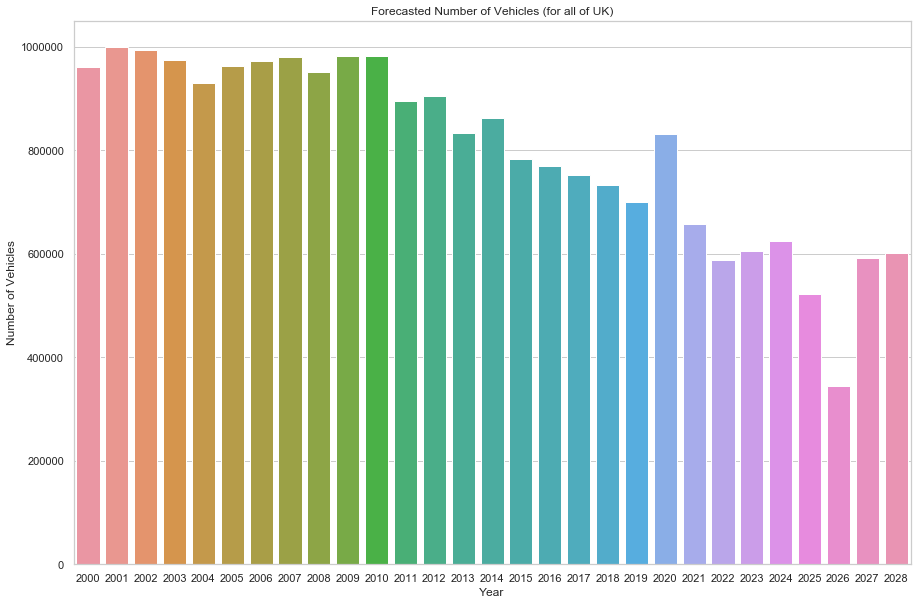

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
plt.ylabel('Year')
plt.xlabel('Number of Vehicles')
plt.title('Forecasted Number of Vehicles (for all of UK)')
ax = sns.barplot(data = test, x ='Year', y='Number of Vehicles', estimator = np.mean, ci=95, capsize=.2, errcolor=".2",)

 # mile forecast

In [31]:
miles         = raw_miles[['cars_and_taxis']].multiply(raw_miles['link_length_miles'], axis='index').round(2)

miles         = miles.rename(columns = {'cars_and_taxis': 'cars_and_taxis_miles'})

raw_miles     = raw_miles.join(miles)

raw_miles     = raw_miles.drop(columns = ['cars_and_taxis', 'link_length_miles'])

raw_miles_df  = raw_miles.groupby(['count_date']).agg(
             cars_and_taxis_miles        = ('cars_and_taxis_miles', lambda x: x.sum().round(2)))

raw_miles_df     = raw_miles_df.reset_index()
raw_miles_df

,count_date,cars_and_taxis_miles
0,2000-03-17,2157816.36
1,2000-03-20,1563899.53
2,2000-03-21,2467871.69
3,2000-03-22,2088530.95
4,2000-03-23,2258830.21
...,...,...
2112,2018-11-01,25693.87
2113,2018-11-02,28809.63
2114,2018-11-05,72116.46
2115,2018-11-06,27804.99


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


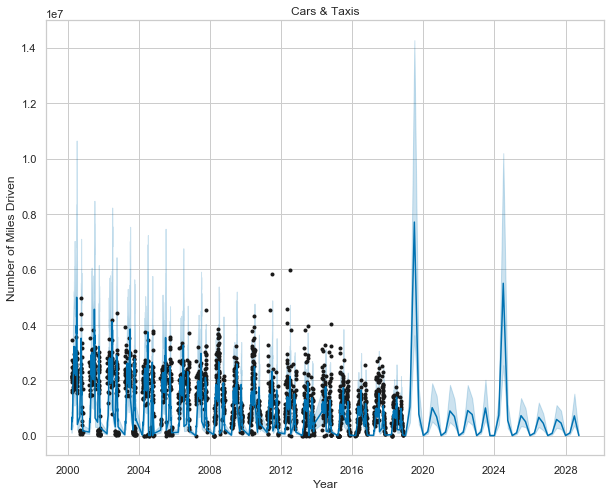

In [32]:
raw_miles_df['count_date'] = pd.to_datetime(raw_miles_df['count_date'])
raw_miles_df               = raw_miles_df.rename(columns = {'count_date': 'ds', 'cars_and_taxis_miles': 'y'})
raw_miles_df['y']          = raw_miles_df['y'] + 1e-8
raw_miles_df['y']          = np.log1p(raw_miles_df['y'])

raw_miles_df_m  = Prophet(growth = 'linear',interval_width = 0.3, changepoint_prior_scale=0.01)
raw_miles_df_m.fit(raw_miles_df)
raw_miles_df_future   = raw_miles_df_m.make_future_dataframe(periods=40, freq ='Q')
raw_miles_df_forecast = raw_miles_df_m.predict(raw_miles_df_future)

plt.figure(figsize = (10,8))
plt.title('Cars & Taxis')
plt.ylabel('Number of Miles Driven')
plt.xlabel('Year')

plt.plot(raw_miles_df_m.history['ds'].dt.to_pydatetime(), np.exp(raw_miles_df_m.history['y']), 'k.',markersize = 3.5)

y = np.exp(raw_miles_df_m.history['y'])
plt.plot(raw_miles_df_m.history['ds'].dt.to_pydatetime(), y, 'k.')
plt.plot(raw_miles_df_forecast['ds'], np.exp(raw_miles_df_forecast['yhat']), ls='-', c='#0072B2')
plt.fill_between(raw_miles_df_forecast['ds'], np.exp(raw_miles_df_forecast['yhat_lower']), np.exp(raw_miles_df_forecast['yhat_upper']), color='#0072B2', alpha=0.2)

In [34]:
raw_miles_df_forecast['ds'] = raw_miles_df_forecast['ds'].apply(lambda x: x.year)
raw_miles_df_forecast['yhat'] = np.exp(raw_miles_df_forecast['yhat'])
cars_and_taxis_miles = raw_miles_df_forecast.groupby(['ds']).agg(yhat = ('yhat', lambda x: x.mean().round(2)))
cars_and_taxis_miles.head()  

AttributeError: 'int' object has no attribute 'year'

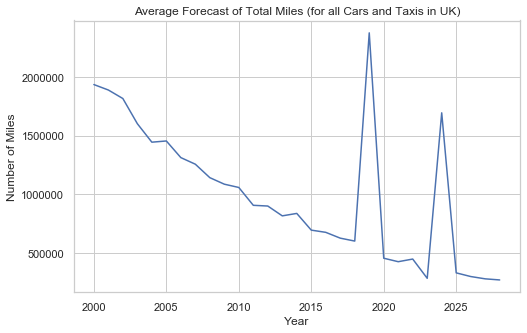

In [35]:
plt.figure(figsize = (8,5))
plt.plot(cars_and_taxis_miles, c= 'b')
plt.title('Average Forecast of Total Miles (for all Cars and Taxis in UK)')
plt.xlabel('Year')
plt.ylabel('Number of Miles')
plt.show()

Mile Mean is the average of the three locations (Scotland/ South East/ London) with the highest availablity of EV charging stations. This Mile Mean is the forecasted average mile amounts for the next 10 years (2019->2028), from the history of the last ten years (2019->2000).

With this mile mean we can calculate the MAX average amount of miles driven in the forecasted next ten years, we can convert that value to KWh or TWh or GWh as those values are used to calculate EV power usage per mile. By calculating the max amount you can leave room for error and any non-used power can be rolled over. 

Between 2007 and 2015, the UK's peak electrical demand fell from 61.5 GW to 52.7.GW.


https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/820708/Chapter_5.pdf


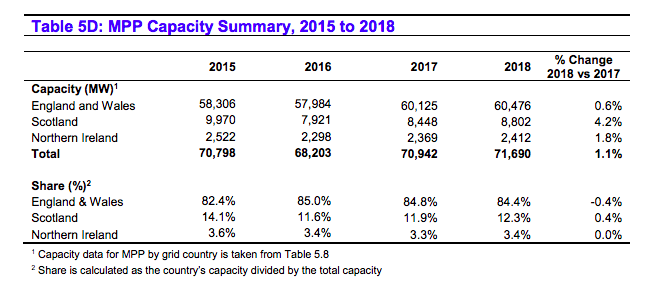

------------------

total capacity of england/ wales = 60,476MW


3.5 miles --> 1KWh --> 1000000 MW


so 60,476MW --> 0.006047KWh


In [36]:
capacity = [['2015', 68276 ], ['2016', 65905], ['2017', 65905], ['2018', 69278]]
capacity = pd.DataFrame(capacity, columns = ['year', 'total_MW']) 
capacity['year'] = pd.to_datetime(capacity['year'])

capacity

,year,total_MW
0,2015-01-01,68276
1,2016-01-01,65905
2,2017-01-01,65905
3,2018-01-01,69278


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


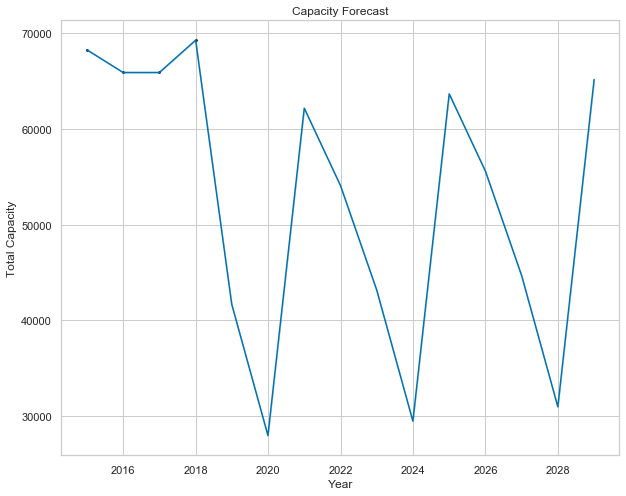

In [37]:
capacity['year'] = pd.to_datetime(capacity['year'])
capacity = capacity.rename(columns = {'year': 'ds', 'total_MW': 'y'})
capacity['y']          = capacity['y'] + 1e-8

cap_m = Prophet(growth = 'linear',interval_width = 0.3, changepoint_prior_scale=0.01)
cap_m.fit(capacity)
cap_future   = cap_m.make_future_dataframe(periods=11, freq ='y')
cap_forecast = cap_m.predict(cap_future)

plt.figure(figsize = (10,8))
plt.title('Capacity Forecast')
plt.ylabel('Total Capacity')
plt.xlabel('Year')

plt.plot(cap_m.history['ds'].dt.to_pydatetime(), cap_m.history['y'], 'k.',markersize = 3.5)

y = np.exp(cap_m.history['y'])
plt.plot(cap_m.history['ds'].dt.to_pydatetime(), y, 'k.')
plt.plot(cap_forecast['ds'], cap_forecast['yhat'], ls='-', c='#0072B2')
plt.fill_between(cap_forecast['ds'], cap_forecast['yhat_lower'], cap_forecast['yhat_upper'], color='#0072B2', alpha=0.2)

In [38]:
cap_forecast['ds'] = cap_forecast['ds'].apply(lambda x: x.year)
cap = cap_forecast.groupby(['ds']).agg(yhat = ('yhat', lambda x: x.mean().round(2)))
cap = cap.rename(columns = { 'yhat': 'yhat_capacity_MW'})

In [39]:
compare = cap.merge(cars_and_taxis_miles  , on='ds')
compare = compare.rename(columns={'yhat': 'yhat_cars_taxis_miles'})
compare['cars_taxis_KW_miles'] = compare['yhat_cars_taxis_miles'].apply(lambda x: x/0.337)
compare['cars_taxis_MW_miles'] = compare['cars_taxis_KW_miles'].apply(lambda x: x/1000)

#since 1% of capacity is transport
compare['current_transport_capacity_MW'] = compare['yhat_capacity_MW'].apply(lambda x: x*0.01)

compare = compare[['yhat_cars_taxis_miles', 'cars_taxis_KW_miles','cars_taxis_MW_miles', 'yhat_capacity_MW','current_transport_capacity_MW']]
compare = compare.reset_index()
compare

,ds,yhat_cars_taxis_miles,cars_taxis_KW_miles,cars_taxis_MW_miles,yhat_capacity_MW,current_transport_capacity_MW
0,2015,693425.74,2.057643e+06,2057.643145,68276.00,682.7600
1,2016,674515.21,2.001529e+06,2001.528813,65905.00,659.0500
2,2017,624958.79,1.854477e+06,1854.477122,65905.00,659.0500
3,2018,599911.41,1.780153e+06,1780.152552,55481.75,554.8175
4,2019,2377095.04,7.053694e+06,7053.694481,27973.27,279.7327
5,2020,453640.39,1.346114e+06,1346.113917,62173.89,621.7389
6,2021,423944.73,1.257996e+06,1257.996231,54094.41,540.9441
7,2022,446504.97,1.324941e+06,1324.940564,43186.59,431.8659
8,2023,282170.77,8.373020e+05,837.301988,29474.36,294.7436
9,2024,1694535.06,5.028294e+06,5028.293947,63674.97,636.7497


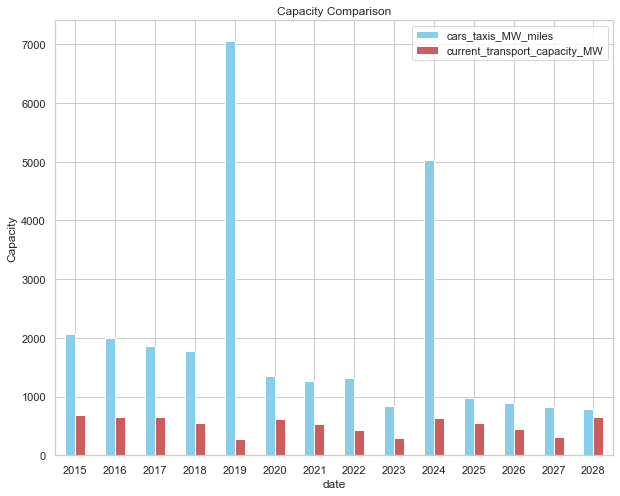

In [40]:
compare2 = compare[['ds', 'cars_taxis_MW_miles', 'current_transport_capacity_MW']]
compare2 = compare2.set_index('ds')

ax = compare2.plot.bar(color=["SkyBlue","IndianRed"], figsize = (10,8), rot=0, title="Capacity Comparison")
ax.set_xlabel("date")
ax.set_ylabel("Capacity")
plt.show()

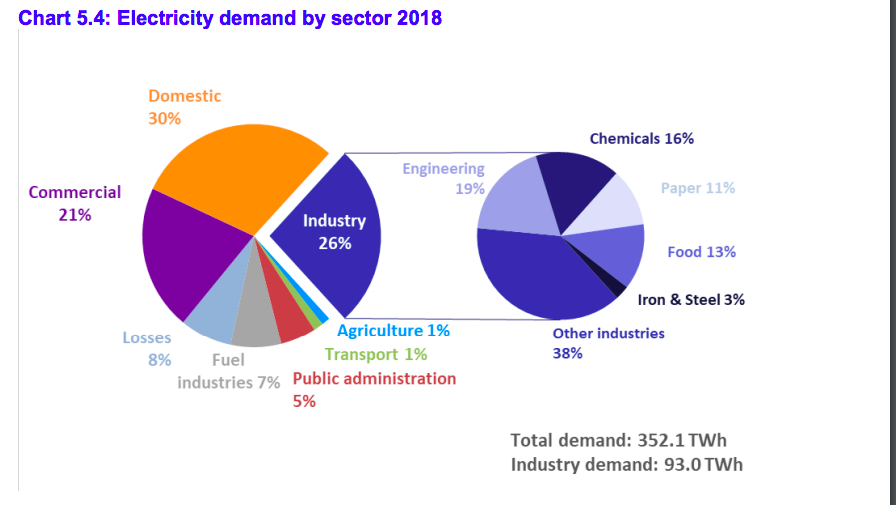

## Task 3

# RENEWABLE ENERGY

## Generation of electricity from renewable sources

In [41]:
#https://www.gov.uk/government/statistics/regional-renewable-statistics
 
region_gen = pd.read_csv('regional_gen.csv', sep=',', skipinitialspace=True)
region_gen.head()

,Year,Region,Wind2,OnshoreWind,OffshoreWind,Waveandtidal,SolarPV,Hydro,Landfillgas,Sewagegas,Otherbioenergy(inclSewagegas3,AD,Biomassandwaste3,Total
0,2003,EastMidlands,1.3,NaN,NaN,NaN,NaN,5.5,223.1,NaN,202.7,NaN,NaN,432.6
1,2003,EastofEngland,19.8,NaN,NaN,NaN,NaN,NaN,756.4,NaN,748.8,NaN,NaN,1525.0
2,2003,NorthEast,28.6,NaN,NaN,NaN,NaN,NaN,89.9,NaN,139.0,NaN,NaN,257.5
3,2003,NorthWest,120.8,NaN,NaN,NaN,NaN,2.0,519.4,NaN,216.3,NaN,NaN,858.5
4,2003,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438.8,NaN,NaN,438.8


In [42]:
region_cap = region_gen.pivot_table(index = ['Year'], values=[
 'OnshoreWind',
 'OffshoreWind',
 'Hydro', 'SolarPV'], aggfunc='sum')

region_cap.tail()

,Hydro,OffshoreWind,OnshoreWind,SolarPV
Year,,,,
2014,5861.0,13404.7,18506.9,3938.9
2015,6296.9,17422.7,22844.1,7437.8
2016,5393.9,16405.8,20742.5,10276.6
2017,5901.5,20915.8,28709.4,11308.2
2018,5486.8,26687.2,30194.3,12558.5


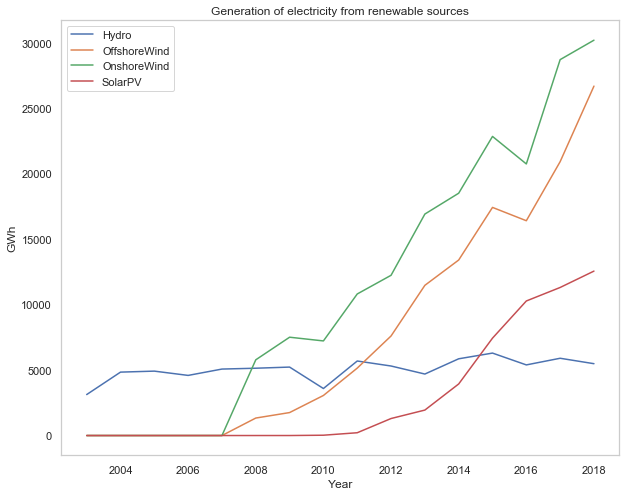

In [44]:
plt.figure(figsize = (10,8))

energy = region_cap.columns

for i in energy:
    plt.plot(region_cap[i], label = i)
    plt.xlabel('Year')
    plt.ylabel('GWh')
    plt.title('Generation of electricity from renewable sources')
    plt.legend()

plt.grid()
plt.show()

## Number of sites generating electricity from renewable sources

In [45]:
#https://www.gov.uk/government/statistics/regional-renewable-statistics
region_site = pd.read_csv('regional_sites.csv', sep=',', skipinitialspace=True)
region_site['Year'] =   pd.to_datetime(region_site['Year'] , format='%Y')

region_site.tail()

,Year,Region,Wind2,OnshoreWind,OffshoreWind,Waveandtidal,SolarPV,Hydro,Landfillgas,Sewagegas,Otherbioenergy3,AD,Biomassandwaste3,TotalexcludingPV,Total
187,2018-01-01,WestMidlands,174.0,174.0,NaN,NaN,67621.0,23.0,29.0,19.0,139,81.0,58.0,384.0,68005
188,2018-01-01,YorkshireandtheHumber,799.0,797.0,2.0,1.0,82145.0,53.0,44.0,25.0,99,43.0,56.0,1021.0,83166
189,2018-01-01,NorthernIreland,1263.0,1263.0,NaN,NaN,23919.0,81.0,17.0,2.0,130,105.0,25.0,1493.0,25412
190,2018-01-01,Scotland,3479.0,3471.0,8.0,16.0,58163.0,747.0,49.0,8.0,129,53.0,76.0,4428.0,62591
191,2018-01-01,Wales,704.0,701.0,3.0,1.0,54578.0,314.0,26.0,16.0,77,28.0,49.0,1138.0,55716


In [64]:
site_region = region_site.groupby(['Region', 'Year']).agg(
    Wind2        = ('Wind2', lambda x: x.sum().round(2)),\
    OnshoreWind  = ('OnshoreWind', lambda x: x.sum().round(2)),\
    OffshoreWind = ('OffshoreWind', lambda x: x.sum().round(2)),\
    Waveandtidal = ('Waveandtidal',lambda x: x.sum().round(2)),\
    SolarPV      = ('SolarPV',lambda x: x.sum().round(2)))
site_region.tail()

Wind2  OnshoreWind  OffshoreWind  \
Region                Year                                           
YorkshireandtheHumber 2014-01-01  694.0          0.0           0.0   
                      2015-01-01  767.0          0.0           0.0   
                      2016-01-01  791.0        789.0           2.0   
                      2017-01-01  797.0        795.0           2.0   
                      2018-01-01  799.0        797.0           2.0   

                                  Waveandtidal  SolarPV  
Region                Year                               
YorkshireandtheHumber 2014-01-01           1.0  57394.0  
                      2015-01-01           1.0  74663.0  
                      2016-01-01           1.0  78673.0  
                      2017-01-01           1.0  80664.0  
                      2018-01-01           1.0  82145.0

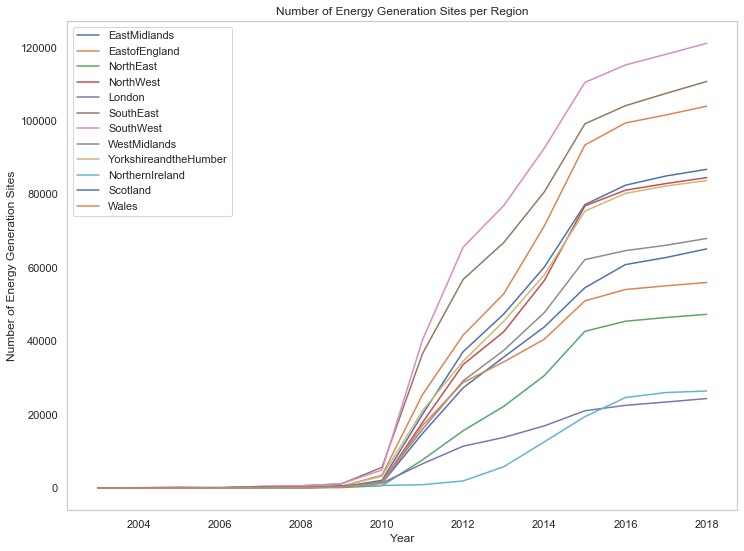

In [67]:
regions = ['EastMidlands', 'EastofEngland', 'NorthEast', 'NorthWest',
       'London', 'SouthEast', 'SouthWest', 'WestMidlands',
       'YorkshireandtheHumber', 'NorthernIreland', 'Scotland', 'Wales']

plt.figure(figsize = (12,9))
plt.title('Number of Energy Generation Sites per Region')
plt.xlabel('Year')
plt.ylabel('Number of Energy Generation Sites')
plt.legend()

for i in regions:
    region = site_region.loc[i].sum(axis = 1).reset_index()

    region = region.rename(columns = {'Year':'Year', 0: 'energy'})

    region['Year'] = region['Year'].apply(lambda x: x.year)
    region = region.groupby(['Year']).agg(energy = ('energy', lambda x: x.mean().round(2)))
    
    plt.plot(region, label = i)

    plt.legend()
plt.grid()
plt.show()

In [50]:
site = region_site[['Year','Region','Hydro', 'OffshoreWind','OnshoreWind','Waveandtidal','Wind2', 'SolarPV']]
site['Total'] = site.sum(axis = 1, skipna = True) 
site

,Year,Region,Hydro,OffshoreWind,OnshoreWind,Waveandtidal,Wind2,SolarPV,Total
0,2003-01-01,EastMidlands,11.0,NaN,NaN,NaN,3.0,8.0,22.0
1,2003-01-01,EastofEngland,NaN,NaN,NaN,NaN,9.0,5.0,14.0
2,2003-01-01,NorthEast,NaN,NaN,NaN,NaN,12.0,5.0,17.0
3,2003-01-01,NorthWest,13.0,NaN,NaN,NaN,19.0,5.0,37.0
4,2003-01-01,London,NaN,NaN,NaN,NaN,NaN,22.0,22.0
...,...,...,...,...,...,...,...,...,...
187,2018-01-01,WestMidlands,23.0,NaN,174.0,NaN,174.0,67621.0,67992.0
188,2018-01-01,YorkshireandtheHumber,53.0,2.0,797.0,1.0,799.0,82145.0,83797.0
189,2018-01-01,NorthernIreland,81.0,NaN,1263.0,NaN,1263.0,23919.0,26526.0
190,2018-01-01,Scotland,747.0,8.0,3471.0,16.0,3479.0,58163.0,65884.0


In [51]:
df_region1 = site[site['Year']=='2018-01-01']
df_region1 = df_region1.groupby(["Region"]).Total.sum().reset_index()
locations = df_region1.set_index('Region')
locations

,Total
Region,
EastMidlands,86828.0
EastofEngland,103986.0
London,24380.0
NorthEast,47326.0
NorthWest,84626.0
NorthernIreland,26526.0
Scotland,65884.0
SouthEast,110747.0
SouthWest,121247.0


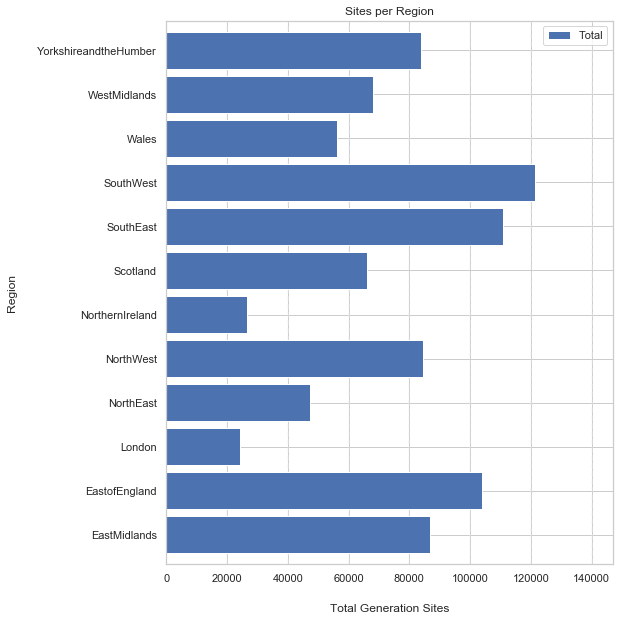

In [52]:
ax = locations.plot(kind = 'barh', figsize=(8, 10),  zorder=2, width=0.85)

vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Total Generation Sites", labelpad=20, size=12)
ax.set_ylabel("Region", labelpad=20, size=12)
ax.set_title("Sites per Region")

plt.show()

## Optimization

In [53]:
energy = [['offshore_wind',0.2215,13575,35000 ], ['onshore_wind',0.866,8483,25000 ],['hydro',0.70,4600],\
         ['solar',0.43,13123], ['wave_tidal',0.35,300]]

df = pd.DataFrame(energy, columns = ['energy','cost kwh', 'capacity', 'project cost (£/MW)']) 
df.set_index('energy')

,cost kwh,capacity,project cost (£/MW)
energy,,,
offshore_wind,0.2215,13575,35000.0
onshore_wind,0.8660,8483,25000.0
hydro,0.7000,4600,NaN
solar,0.4300,13123,NaN
wave_tidal,0.3500,300,NaN


In [54]:
#costs of each one
region_cap['OffshoreWind'] = region_cap['OffshoreWind'].apply(lambda x: (x*0.2215))
region_cap['OnshoreWind']  = region_cap['OnshoreWind'].apply(lambda x: (x*0.8660))
region_cap['Hydro']        = region_cap['Hydro'].apply(lambda x: (x*0.7000))
region_cap['SolarPV']      = region_cap['SolarPV'].apply(lambda x: (x*0.4300))
region_cap = region_cap.reset_index()
# region_cap = region_cap.set_index('Year')
region_cap.tail()

,Year,Hydro,OffshoreWind,OnshoreWind,SolarPV
11,2014,4102.70,2969.14105,16026.9754,1693.727
12,2015,4407.83,3859.12805,19782.9906,3198.254
13,2016,3775.73,3633.88470,17963.0050,4418.938
14,2017,4131.05,4632.84970,24862.3404,4862.526
15,2018,3840.76,5911.21480,26148.2638,5400.155


In [55]:
# cost of each one as of 2018
recent_cost = region_cap[region_cap['Year']==2018]
recent_cost.tail()

,Year,Hydro,OffshoreWind,OnshoreWind,SolarPV
15,2018,3840.76,5911.2148,26148.2638,5400.155


In [56]:
# total number of generation locations as of 2018
loc = region_site[['Year', 'Region', 'OnshoreWind', 'OffshoreWind']]
loc2 = loc[loc['Year']=='2018-01-01']
del loc2['Year']
# loc2 = loc2.reset_index('Region')
loc2

,Region,OnshoreWind,OffshoreWind
180,EastMidlands,421.0,3.0
181,EastofEngland,879.0,9.0
182,NorthEast,271.0,3.0
183,NorthWest,514.0,9.0
184,London,31.0,NaN
185,SouthEast,104.0,5.0
186,SouthWest,817.0,NaN
187,WestMidlands,174.0,NaN
188,YorkshireandtheHumber,797.0,2.0
189,NorthernIreland,1263.0,NaN


In [57]:
# cost of each one as of 2018
recent_cost = region_cap[['Year', 'OffshoreWind', 'OnshoreWind']]
recent_cost = recent_cost[recent_cost['Year']==2018]
recent_cost.tail()

,Year,OffshoreWind,OnshoreWind
15,2018,5911.2148,26148.2638


In [58]:
locs = ['EastMidlands', 'EastofEngland', 'NorthEast', 'NorthWest',
       'London', 'SouthEast', 'SouthWest', 'WestMidlands',
       'YorkshireandtheHumber', 'NorthernIreland', 'Scotland', 'Wales']
off= []
on = []

for i in locs:
    cost   = np.array(recent_cost)
    amount = loc2[loc2['Region']==i]
    amount = np.array(amount) 
    
    total_off = np.prod(cost[0][1] / amount[0][2])
    total_on  = np.prod(cost[0][2] / amount[0][1])
    
    total_off *= 0.48
    total_on  *= 0.25
    
    off.append(total_off) 
    on.append(total_on)

idx_max_off = off.index(max(off))
idx_min_off = off.index(min(off))

idx_max_on = on.index(max(on))
idx_min_on = on.index(min(on))

print('max offshore:', locs[idx_max_off])
print('max onshore:', locs[idx_max_on])

print('--------------------------------')
print('min offshore:', locs[idx_min_off])
print('min onshore:',  locs[idx_min_on])

max offshore: YorkshireandtheHumber
max onshore: London
--------------------------------
min offshore: EastofEngland
min onshore: Scotland


In [59]:
test_final = pd.DataFrame(columns = ['region','total offshore', 'total onshore']) 
test_final['total offshore'] = off
test_final['total onshore'] = on
test_final['region'] = locs
test_final = test_final.set_index('region')
test_final

,total offshore,total onshore
region,,
EastMidlands,945.794368,15.527473
EastofEngland,315.264789,7.436935
NorthEast,945.794368,24.122015
NorthWest,315.264789,12.718027
London,NaN,210.873095
SouthEast,567.476621,62.856403
SouthWest,NaN,8.001305
WestMidlands,NaN,37.569345
YorkshireandtheHumber,1418.691552,8.202090
